## CART概述
      所谓CART算法，全名叫Classification and Regression Tree，即分类与回归树。顾名思义，相较于此前的ID3算法和C4.5算法，CART除了可以用于分类任务外，还可以完成回归分析。完整的CART算法包括特征选择、决策树生成和决策树剪枝三个部分。


CART算法主要包括回归树和分类树两种。回归树用于目标变量为连续型的建模任务，其特征选择准则用的是**平方误差最小准则**。分类树用于目标变量为离散型的的建模任务，其特征选择准则用的是**基尼指数(Gini Index)**，这也有别于此前ID3的信息增益准则和C4.5的信息增益比准则。无论是回归树还是分类树，其算法核心都在于递归地选择最优特征构建决策树。

### 回归树

在构建CART树的时候，我们遍历所有特征的所有取值 ——以这个特征的这个取值为分割依据、得到两组样本 ，然后计算对这两组样本的预测误差。遍历完毕后，选取预测误差最小的那一个特征的取值 。

为了使MSE最小，一般以一组样本的输出值的均值作为预测值

https://zhuanlan.zhihu.com/p/82054400

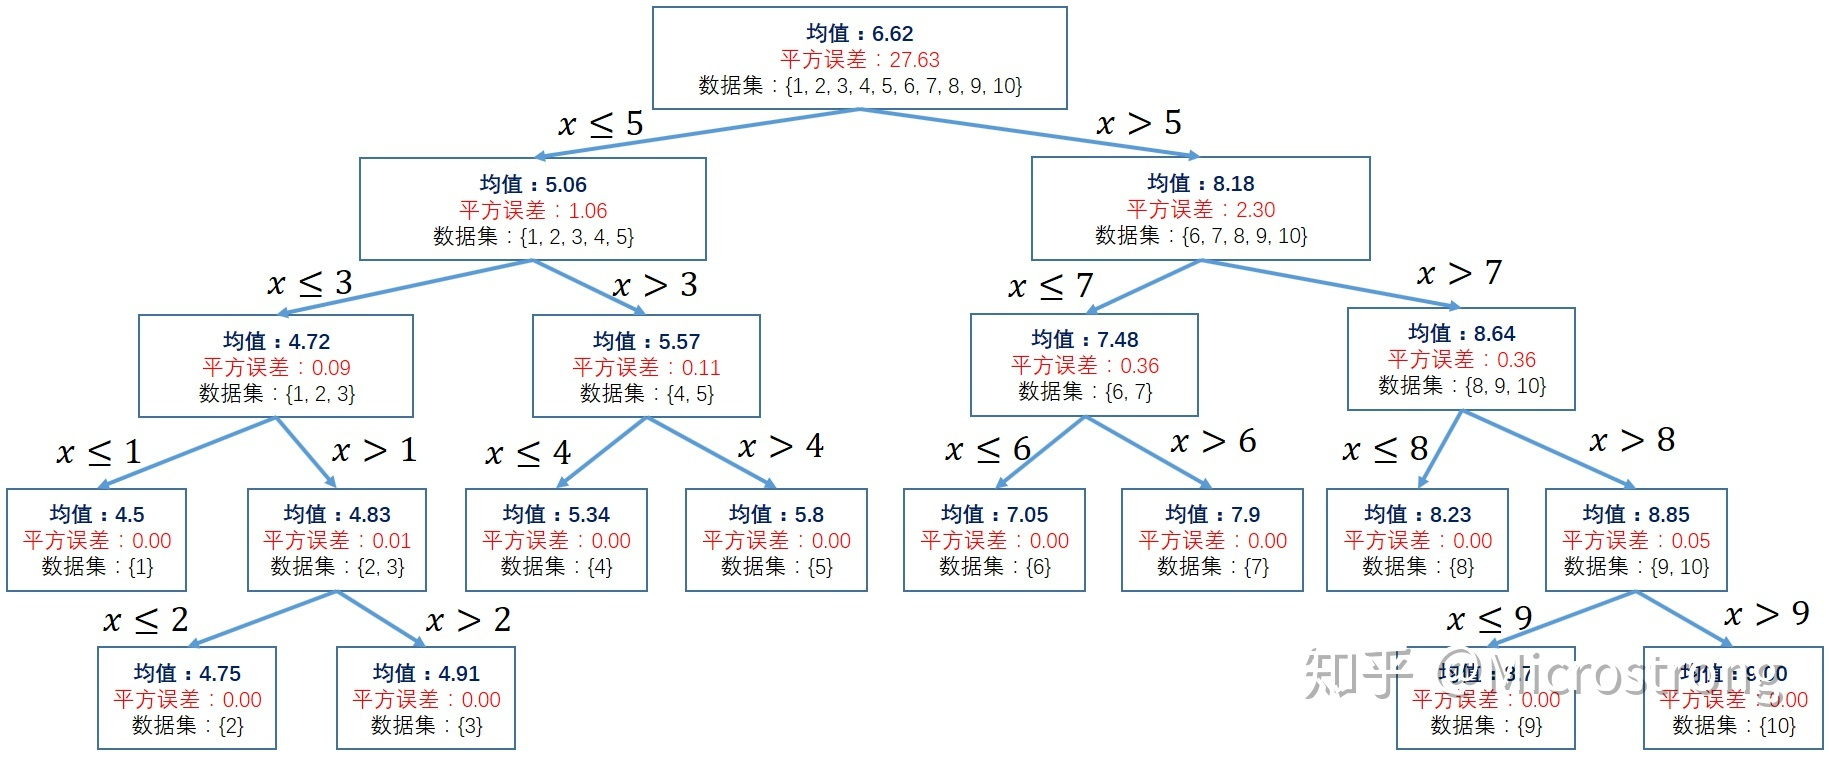

### 分类树

Gini指数是针对概率分布而言的。假设在一个分类问题中有K个类，样本属于第k个类的概率为Pk，则该样本概率分布的基尼指数为
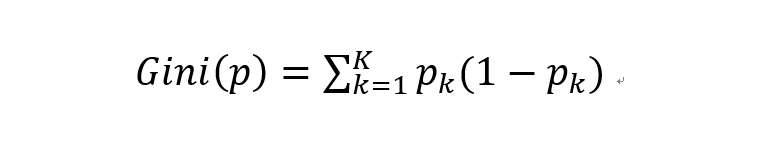

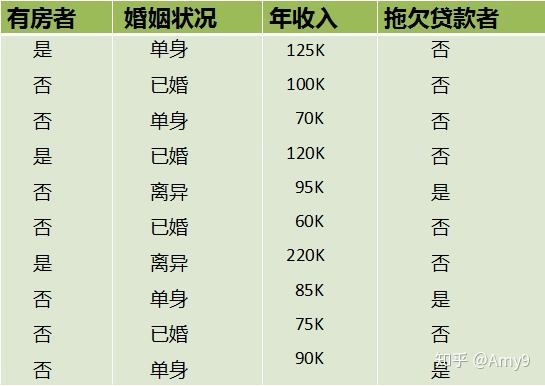

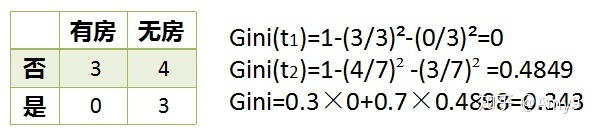

#### 剪枝
 通常来说，有两种剪枝方法。一种是在决策树生成过程中进行剪枝，也叫预剪枝(pre-pruning)。另一种就是前面说的基于生成好的决策树自底向上的进行剪枝，又叫后剪枝(post-pruning)。

In [1]:
def gini(nums):
    probs = [nums.count(i)/len(nums) for i in set(nums)]
    gini = sum([p*(1-p) for p in probs]) 
    return gini

In [3]:
import pandas as pd
df = pd.read_csv('./example_data.csv', dtype={'windy': 'str'})
gini(df['play'].tolist())

0.4591836734693877

In [4]:
def split_dataframe(data, col):
    '''
    function: split pandas dataframe to sub-df based on data and column.
    input: dataframe, column name.
    output: a dict of splited dataframe.
    '''
    # unique value of column
    unique_values = data[col].unique()    
    # empty dict of dataframe

    result_dict = {elem : pd.DataFrame for elem in unique_values}    
    # split dataframe based on column value

    for key in result_dict.keys():
        result_dict[key] = data[:][data[col] == key]    
    return result_dict

In [7]:
split_dataframe(df, 'temp')

{'hot':    humility   outlook play temp  windy
 0      high     sunny   no  hot  false
 1      high     sunny   no  hot   true
 2      high  overcast  yes  hot  false
 12   normal  overcast  yes  hot  false,
 'mild':    humility   outlook play  temp  windy
 3      high     rainy  yes  mild  false
 7      high     sunny   no  mild  false
 9    normal     rainy  yes  mild  false
 10   normal     sunny  yes  mild   true
 11     high  overcast  yes  mild   true
 13     high     rainy   no  mild   true,
 'cool':   humility   outlook play  temp  windy
 4   normal     rainy  yes  cool  false
 5   normal     rainy   no  cool   true
 6   normal  overcast  yes  cool   true
 8   normal     sunny  yes  cool  false}

In [8]:
def choose_best_col(df, label):
    '''
    funtion: choose the best column based on infomation gain.
    input: datafram, label
    output: max infomation gain, best column, 
            splited dataframe dict based on best column.
    '''
    # Calculating label's gini index
    gini_D = gini(df[label].tolist())    
    # columns list except label

    cols = [col for col in df.columns if col not in [label]]    
    # initialize the max infomation gain, best column and best splited dict

    min_value, best_col = 999, None
    min_splited = None
    # split data based on different column
    for col in cols:
        splited_set = split_dataframe(df, col)
        gini_DA = 0
        for subset_col, subset in splited_set.items():            
        # calculating splited dataframe label's gini index

            gini_Di = gini(subset[label].tolist())            
            # calculating gini index of current feature

            gini_DA += len(subset)/len(df) * gini_Di        
            if gini_DA < min_value:

                min_value, best_col = gini_DA, col
                min_splited = splited_set    
            return min_value, best_col, min_splited

In [9]:
choose_best_col(df,'temp') #temp为y的话先选到特征humodity

(0.24489795918367346,
 'humility',
 {'high':    humility   outlook play  temp  windy
  0      high     sunny   no   hot  false
  1      high     sunny   no   hot   true
  2      high  overcast  yes   hot  false
  3      high     rainy  yes  mild  false
  7      high     sunny   no  mild  false
  11     high  overcast  yes  mild   true
  13     high     rainy   no  mild   true,
  'normal':    humility   outlook play  temp  windy
  4    normal     rainy  yes  cool  false
  5    normal     rainy   no  cool   true
  6    normal  overcast  yes  cool   true
  8    normal     sunny  yes  cool  false
  9    normal     rainy  yes  mild  false
  10   normal     sunny  yes  mild   true
  12   normal  overcast  yes   hot  false})